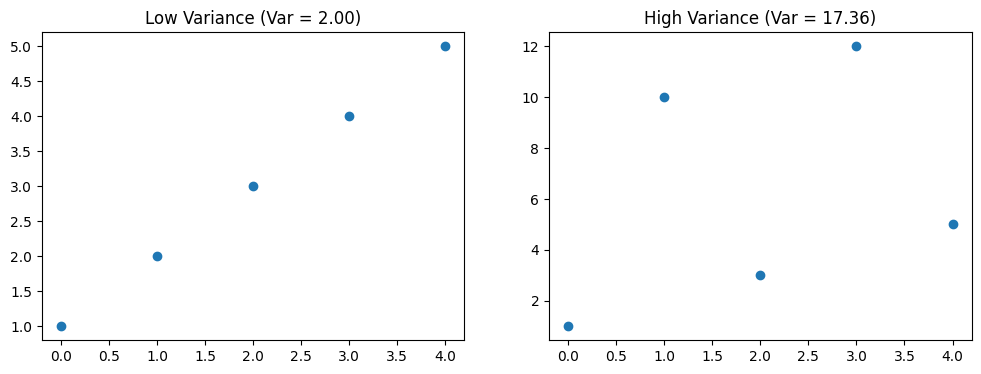

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two vectors with different variances
low_variance_vector = np.array([1, 2, 3, 4, 5])
high_variance_vector = np.array([1, 10, 3, 12, 5])

# Calculate variance for each vector
low_variance = np.var(low_variance_vector)
high_variance = np.var(high_variance_vector)

# Plot the vectors
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(range(len(low_variance_vector)), low_variance_vector)
plt.title(f'Low Variance (Var = {low_variance:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(range(len(high_variance_vector)), high_variance_vector)
plt.title(f'High Variance (Var = {high_variance:.2f})')

plt.show()


norm [0.4472136  0.89442719]
(2,)
7.602631123499285
(array([5, 6]), [7.602631123499285])


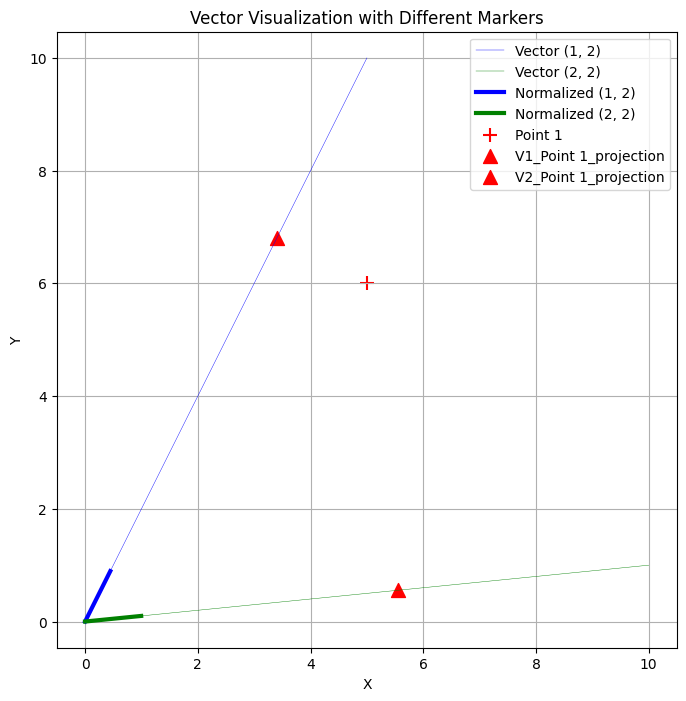

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vectors
vector1 = np.array([5,10])
vector2 = np.array([10, 1])

# Normalize the vectors
normalized_vector1 = vector1 / np.linalg.norm(vector1)
normalized_vector2 = vector2 / np.linalg.norm(vector2)
print("norm",normalized_vector1)
# Define a point not in the same line
points = np.array([5, 6])
print(vector1.shape)
# Calculate the projections of the points onto the vectors
projections1 = np.dot(np.transpose(normalized_vector1),points)
projections2 = np.dot(np.transpose(normalized_vector2),points)
print((projections1))
# Plot the vectors and their normalized versions
plt.figure(figsize=(8, 8))
plt.plot([0, vector1[0]], [0, vector1[1]], 'b',linewidth=0.3, label='Vector (1, 2)')
plt.plot([0, vector2[0]], [0, vector2[1]], 'g',linewidth=.3, label='Vector (2, 2)')
plt.plot([0, normalized_vector1[0]], [0, normalized_vector1[1]], 'b', linewidth=3, label='Normalized (1, 2)')
plt.plot([0, normalized_vector2[0]], [0, normalized_vector2[1]], 'g', linewidth=3, label='Normalized (2, 2)')

# Plot the points and their projections with different markers
markers = ['+', '^', 's']
colors = ['r', 'b', 'g']
print((points, [projections1]))

plt.scatter(points[0], points[1], c=colors[0], marker=markers[0], s=100, label=f'Point { 1}')
plt.scatter(projections1 * normalized_vector1[0], projections1 * normalized_vector1[1], c=colors[0], marker=markers[1], s=100,label=f'V1_Point { 1}_projection')
plt.scatter(projections2 * normalized_vector2[0], projections2 * normalized_vector2[1], c=colors[0], marker=markers[1], s=100,label=f'V2_Point { 1}_projection')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Visualization with Different Markers')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


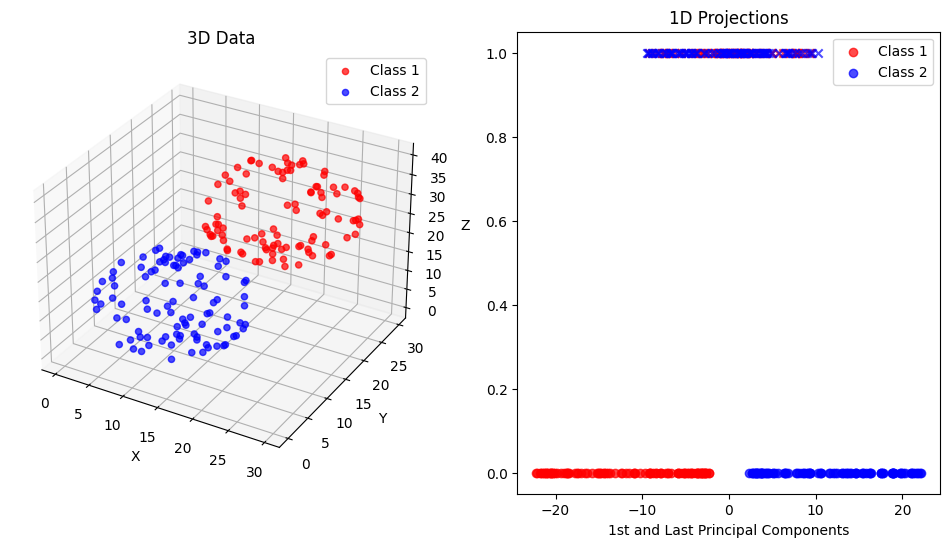

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(0)

# Function to generate points on a sphere around a given center
def generate_sphere_points(center, radius, num_points):
    phi = np.random.uniform(0, 2* np.pi, num_points)
    theta = np.random.uniform(0, np.pi, num_points)
    x = center[0] + radius * np.sin(theta) * np.cos(phi)
    y = center[1] + radius * np.sin(theta) * np.sin(phi)
    z = center[2] + radius * np.cos(theta)
    return x, y, z

# Generate points for Class 1 (sphere around (10, 10, 10))
num_points_per_class = 100
center1 = (20, 20, 30)
radius1 = 10
class1_x, class1_y, class1_z = generate_sphere_points(center1, radius1, num_points_per_class)

# Generate points for Class 2 (sphere around (5, 10, 10))
center2 = (10, 10, 10)
radius2 = 10
class2_x, class2_y, class2_z = generate_sphere_points(center2, radius2, num_points_per_class)

# Combine the points
data = np.vstack((np.hstack((class1_x, class2_x)),
                  np.hstack((class1_y, class2_y)),
                  np.hstack((class1_z, class2_z))))
labels = np.hstack((np.zeros(num_points_per_class), np.ones(num_points_per_class)))

# Perform PCA
mean = np.mean(data, axis=1)
centered_data = data - mean[:, np.newaxis]
cov_matrix = np.cov(centered_data, rowvar=True)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Project the data onto 1D using the first and last eigenvalues
projection1D_first = centered_data.T.dot(eigenvectors[:, 0])
projection1D_last = centered_data.T.dot(eigenvectors[:, -1])

# # Adjust the projection to ensure 0 is not the center
# projection1D_first -= np.mean(projection1D_first)
# projection1D_last -= np.mean(projection1D_last)

# Visualization
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# 3D Scatter plot with alpha for overlapping points
ax1.scatter(class1_x, class1_y, class1_z, c='r', label='Class 1', alpha=0.7)
ax1.scatter(class2_x, class2_y, class2_z, c='b', label='Class 2', alpha=0.7)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Data')
ax1.legend()

# 1D Projections on the same scatter plot
ax2.scatter(projection1D_first[labels == 0], np.zeros(num_points_per_class), c='r', label='Class 1', alpha=0.7)
ax2.scatter(projection1D_first[labels == 1], np.zeros(num_points_per_class), c='b', label='Class 2', alpha=0.7)
ax2.scatter(projection1D_last[labels == 0], np.ones(num_points_per_class), c='r', marker='x', alpha=0.7)
ax2.scatter(projection1D_last[labels == 1], np.ones(num_points_per_class), c='b', marker='x', alpha=0.7)
ax2.set_xlabel('1st and Last Principal Components')
ax2.set_title('1D Projections')
ax2.legend()

plt.show()

# Creating the 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=class1_x, y=class1_y, z=class1_z, mode='markers', marker=dict(size=6, color='red', symbol='circle'), name='Class 1'))
fig.add_trace(go.Scatter3d(x=class2_x, y=class2_y, z=class2_z, mode='markers', marker=dict(size=6, color='blue', symbol='circle'), name='Class 2'))

# Customizing the layout
fig.update_layout(title='3D Scatter Plot Example',
                  scene=dict(xaxis_title='x axis', yaxis_title='y axis', zaxis_title='z axis'),
                  showlegend=True)

fig.show()


In [ ]:
# PCA with SVD
import numpy as np
import plotly.graph_objects as go

# Define the data points
data_points = np.array([
    [2, 3, 5],
    [4, 1, 7],
    [1, 6, 3],
    [5, 2, 8]
])
# Step 0: Calculate the mean
mean = np.mean(data_points, axis=0)
# Output mean
print("Mean of the data:")
print(mean)
# Step 1: center the data
centered_data = data_points - mean
# Output centered data
print("\nCentered Data:")
print(centered_data)
# Step 3: Perform Singular Value Decomposition (SVD) on the covariance matrix
U, S, Vt = np.linalg.svd(centered_data.T)
# Output singular values, left singular vectors (U), and right singular vectors (Vt)
print("\nSingular Values:")
print(S)
print("\nLeft Singular Vectors (U):")
print(U)
print("\nRight Singular Vectors (Vt):")
print(Vt)

# Step 4: First principal component (centered)
first_principal_component = U[:, 0]

# Output first principal component
print("\nFirst Principal Component:")
print(first_principal_component)

# Step 5: Project original data onto the first principal component
projected_data = first_principal_component @ centered_data.T

# Output projected data
print("\nProjected Data:")
print(projected_data)

# Create a 3D scatter plot using Plotly
fig = go.Figure()

# Plot the original data points
fig.add_trace(go.Scatter3d(
    x=data_points[:, 0],
    y=data_points[:, 1],
    z=data_points[:, 2],
    mode='markers',
    marker=dict(color='blue', size=8),
    name='Original Data'
))

# Plot the projected data points along the first principal component
fig.add_trace(go.Scatter3d(
    x=projected_data * first_principal_component[0] + mean[0],
    y=projected_data * first_principal_component[1] + mean[1],
    z=projected_data * first_principal_component[2] + mean[2],
    mode='markers',
    marker=dict(color='red', size=8),
    name='Projected Data'
))

# Plot the first principal component vector
fig.add_trace(go.Scatter3d(
    x=[mean[0], mean[0] + first_principal_component[0]],
    y=[mean[1], mean[1] + first_principal_component[1]],
    z=[mean[2], mean[2] + first_principal_component[2]],
    mode='lines',
    line=dict(color='green', width=5),
    name='First Principal Component'
))

# Update layout for better visualization
fig.update_layout(scene=dict(aspectmode='data'))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Set plot title
fig.update_layout(title='SVD Original Data, Projected Data, and First Principal Component')

# Show the plot
fig.show()


Mean of the data:
[3.   3.   5.75]

Centered Data:
[[-1.    0.   -0.75]
 [ 1.   -2.    1.25]
 [-2.    3.   -2.75]
 [ 2.   -1.    2.25]]

Singular Values:
[6.04450208 1.47084613 0.2249584 ]

Left Singular Vectors (U):
[[ 0.50668907  0.52501008  0.68383521]
 [-0.58835009  0.79035129 -0.17084793]
 [ 0.63016693  0.31576773 -0.70935209]]

Right Singular Vectors (Vt):
[[-0.16201736  0.40881745 -0.74636213  0.49956205]
 [-0.51795756 -0.44938952  0.30776329  0.65958379]
 [-0.67488543  0.61718502  0.31340919 -0.25570879]
 [ 0.5         0.5         0.5         0.5       ]]

First Principal Component:
[ 0.50668907 -0.58835009  0.63016693]

Projected Data:
[-0.97931427  2.47109791 -4.51138746  3.01960382]


In [ ]:
first_principal_component.shape

(3,)

In [ ]:
# PCA with eig
import plotly.graph_objects as go

# Define the data points
data_points = np.array([
    [2, 3, 5],
    [4, 1, 7],
    [1, 6, 3],
    [5, 2, 8]
])
# Step 0: Calculate the mean
mean = np.mean(data_points, axis=0)
# Output mean
print("Mean of the data:");print(mean)
# Step 1: center the data
centered_data = data_points - mean
# Output centered data
print("\nCentered Data:");print(centered_data)
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)
# Step 3: Perform Eigenvalue Decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Sort eigenvalues and eigenvectors in descending order
print("\ Eigenvalues before sort:"); print(eigenvalues)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
# Output eigenvalues and eigenvectors
print("\nSorted Eigenvalues:"); print(eigenvalues)
print("\nSorted Eigenvectors:"); print(eigenvectors)
# Step 4: First principal component (normalized)
first_principal_component = eigenvectors[:, 0]
# Output first principal component
print("\nFirst Principal Component:");print(first_principal_component)
# Step 5: Project original data onto the first principal component
projected_data = centered_data @ first_principal_component

# Output projected data
print("\nProjected Data:")
print(projected_data)

# Create a 3D scatter plot using Plotly
fig = go.Figure()

# Plot the original data points
fig.add_trace(go.Scatter3d(
    x=data_points[:, 0],
    y=data_points[:, 1],
    z=data_points[:, 2],
    mode='markers',
    marker=dict(color='blue', size=8),
    name='Original Data'
))

# Plot the projected data points along the first principal component
fig.add_trace(go.Scatter3d(
    x=projected_data * first_principal_component[0] + mean[0],
    y=projected_data * first_principal_component[1] + mean[1],
    z=projected_data * first_principal_component[2] + mean[2],
    mode='markers',
    marker=dict(color='red', size=8),
    name='Projected Data'
))

# Plot the first principal component vector
fig.add_trace(go.Scatter3d(
    x=[mean[0], mean[0] + first_principal_component[0]],
    y=[mean[1], mean[1] + first_principal_component[1]],
    z=[mean[2], mean[2] + first_principal_component[2]],
    mode='lines',
    line=dict(color='green', width=5),
    name='First Principal Component'
))

# Update layout for better visualization
fig.update_layout(scene=dict(aspectmode='data'))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Set plot title
fig.update_layout(title='Original Data, Projected Data, and First Principal Component')

# Show the plot
fig.show()


Mean of the data:
[3.   3.   5.75]

Centered Data:
[[-1.    0.   -0.75]
 [ 1.   -2.    1.25]
 [-2.    3.   -2.75]
 [ 2.   -1.    2.25]]
\ Eigenvalues before sort:
[12.17866846  0.01686876  0.72112944]

Sorted Eigenvalues:
[12.17866846  0.72112944  0.01686876]

Sorted Eigenvectors:
[[-0.50668907  0.52501008  0.68383521]
 [ 0.58835009  0.79035129 -0.17084793]
 [-0.63016693  0.31576773 -0.70935209]]

First Principal Component:
[-0.50668907  0.58835009 -0.63016693]

Projected Data:
[ 0.97931427 -2.47109791  4.51138746 -3.01960382]




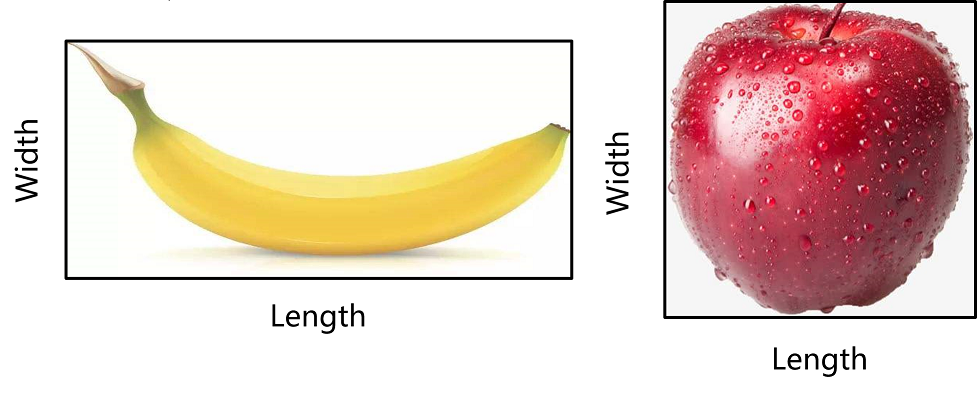


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# All font sizes are set to 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

In [ ]:
np.random.seed(121)

N = 1000
std = 0.5
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])

[[6.233549220186443, 7.075875080080207], [6.258463662916027, 6.6435564903211395], [5.997103110623444, 5.100778803190973], [5.257371741864662, 6.011074255459503], [6.378823154696187, 6.6451951201522625], [6.1149357400354845, 6.35124447011058], [5.624993747233578, 5.84885738050477], [6.321446617570535, 5.722483542133177], [6.080355239279514, 5.169823525119225], [5.860724344476573, 5.919545452690261], [6.073790393216105, 5.74336294826386], [5.596092665377149, 6.381585404434834], [5.645225816005103, 5.82423640237481], [5.780904570820863, 6.156772543367719], [5.400455494585453, 6.0517244798873], [5.95276439560062, 5.935881635501246], [5.750733615726665, 5.113146989576244], [6.214590107613384, 5.619523918809314], [5.601691453262962, 6.7772518795689605], [5.505676385619871, 5.977905223019594], [6.679035840696851, 6.706888877973481], [7.482258453057895, 5.686643546643411], [6.1305028571340365, 6.102330536407792], [5.103556717038144, 6.185720905759585], [6.4631879068711955, 5.2418183778556235],

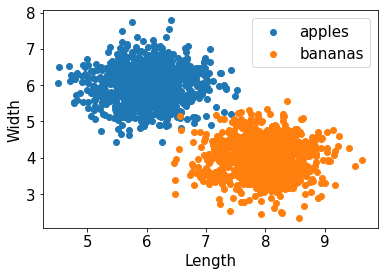

In [ ]:
plt.scatter(x=apples['length'], y=apples['width'], label='apples')
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')

######### The above codes are equivalent to the following codes. For data frames( pandas Object) can be assigned directly by column name #########
# plt.scatter(x='length', y='width', data=apples, label='apples')
# plt.scatter(x='length', y='width', data=bananas, label='bananas')
# plt.legend()
cols = ['length','width']
I=bananas[cols].values.tolist()
J=apples[cols].values.tolist();
print(J)
I=I+J
data=np.array(I)
print((data.shape))

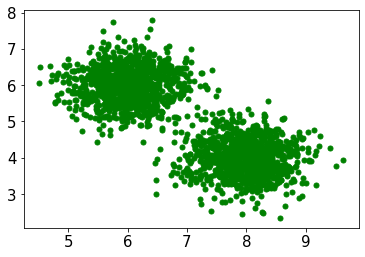

In [ ]:
plt.plot(data[:, 0], data[:, 1], 'o', color='green', markersize=5)
data = (data - np.mean(data, axis=0))/data.std(0)


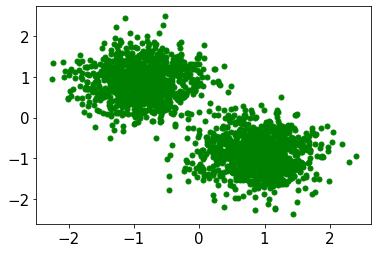

In [ ]:
plt.plot(data[:, 0], data[:, 1], 'o', color='green', markersize=5)
from sklearn.decomposition import PCA

pca = PCA(1)  # project from 2 to 1 dimensions
projected = pca.fit_transform(data)
Inverse=pca.inverse_transform(projected)

(2, 1000)
(2000, 1)


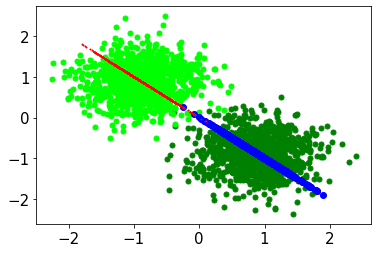

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(1)  # project from 64 to 2 dimensions
J=np.array([np.zeros(1000),np.ones(1000)])
print(J.shape)
projected = pca.fit_transform(data)
print(projected.shape)
d=pca.inverse_transform(projected)
plt.plot(data[:1000, 0], data[:1000, 1], 'o', color='green', markersize=5)
plt.plot(data[1001:, 0], data[1001:, 1], 'o', color='lime', markersize=5)
plt.plot(d[:1000, 0], d[:1000, 1], 'o', color='blue', markersize=6)
plt.plot(d[1001:, 0], d[1001:, 1], '+', color='red', markersize=2)

(-4.0, 4.0, -3.0, 3.0)

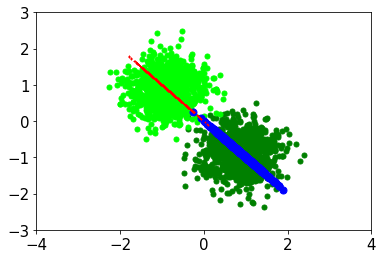

In [ ]:
from sklearn.decomposition import PCA
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_X_y
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
def inverse_transform(lda, x):
    if lda.solver == 'lsqr':
        raise NotImplementedError("(inverse) transform not implemented for 'lsqr' "
                                  "solver (use 'svd' or 'eigen').")
    check_is_fitted(lda, ['xbar_', 'scalings_'], all_or_any=any)
    inv = np.linalg.pinv(lda.scalings_)
    x = check_array(x)
    if lda.solver == 'svd':
        x_back = np.dot(x, inv) + lda.xbar_
    elif lda.solver == 'eigen':
        x_back = np.dot(x, inv)
    return x_back

y=np.concatenate([np.zeros(1000),np.ones(1000)])

lda = LinearDiscriminantAnalysis()
Z = lda.fit(data, y).transform(data)
plt.plot(data[:1000, 0], data[:1000, 1], 'o', color='green', markersize=5)
plt.plot(data[1001:, 0], data[1001:, 1], 'o', color='lime', markersize=5)
LdaI = inverse_transform(lda, Z)
plt.plot(LdaI[:1000, 0], LdaI[:1000, 1], 'o', color='blue', markersize=7)
plt.plot(LdaI[1001:, 0], LdaI[1001:, 1], '+', color='red', markersize=2)
plt.axis([-4, 4, -3, 3])

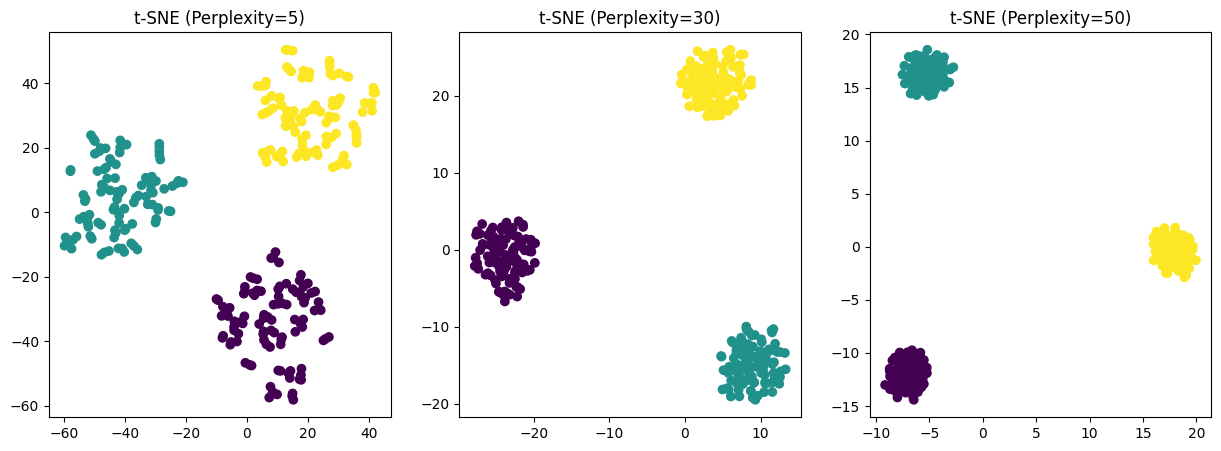

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate 3-cluster data in 10 dimensions
n_samples = 300
n_features = 10
n_clusters = 3
data, labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Apply t-SNE with different perplexity settings
tsne_results = []

# Initialize perplexity values
perplexities = [5, 30, 50]

# Iterate through different perplexity settings
for perplexity in perplexities:
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(data)
    tsne_results.append(tsne_result)

# Visualize the t-SNE results
fig, axes = plt.subplots(1, len(perplexities), figsize=(15, 5))

for i, perplexity in enumerate(perplexities):
    ax = axes[i]
    ax.scatter(tsne_results[i][:, 0], tsne_results[i][:, 1], c=labels)
    ax.set_title(f"t-SNE (Perplexity={perplexity})")

plt.show()


In [ ]:
from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eig(np.array([[3, 1], [0,2]]))
print(eigenvalues,'\n', eigenvectors)

[3. 2.] 
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]
